# Module 2

In [63]:
# imports

import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('./car_fuel_efficiency.csv')

## EDA

In [65]:
df.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341


In [66]:
#column name normalisation
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

#### Graphs and shii

In [67]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

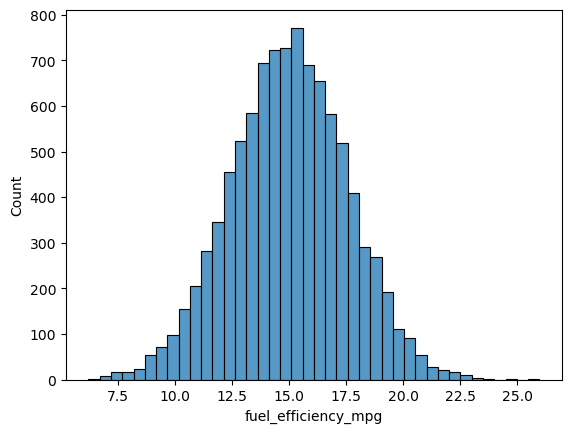

In [68]:
sns.histplot(df.fuel_efficiency_mpg,bins=40)
plt.show()

In [69]:
# Data set filtering

required_cols = ['engine_displacement', 'horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
df = df[required_cols]


In [70]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [71]:
# missing values
df.isnull().sum()


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [72]:
df['horsepower'].median()

149.0

### Splitting and Shuffling dataset

In [73]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [74]:

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [75]:
df_train.head(2)

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019


### Linear regression

In [76]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#### Dataset value imputation

In [99]:
def prepare_X_NA(df):
    df_na = df
    df_na = df_na.fillna(0)
    X = df_na.values
    return X

In [100]:
X_train_NA = prepare_X_NA(df_train)
w0,w = train_linear_regression(X_train_NA,y_train)

In [81]:
y_pred_NA = w0 + X_train_NA.dot(w)


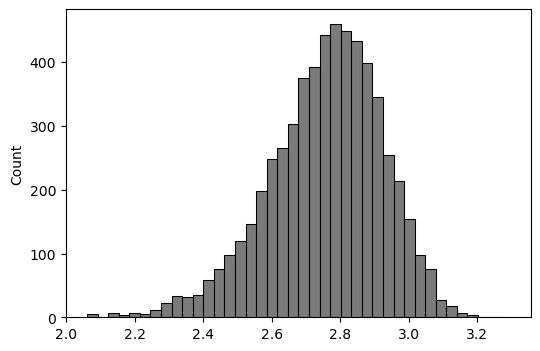

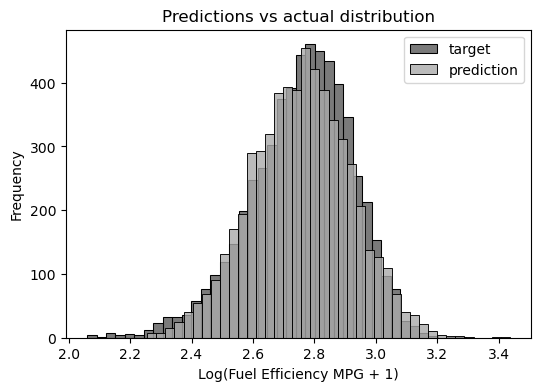

In [83]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_NA, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Fuel Efficiency MPG + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

#### RSME

In [102]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [103]:
# Evaluate on validation set with NA (0) imputation
X_val_NA = prepare_X_NA(df_val)
y_pred_val_NA = w0 + X_val_NA.dot(w)
rmse_NA = round(rmse(y_val, y_pred_val_NA), 2)
print(f"RMSE with 0 imputation: {rmse_NA}")

RMSE with 0 imputation: 0.04


#### Imputing value with mean instead

In [104]:
def prepare_X_MEAN(df, fill_values):
    dfmean = df.copy()
    dfmean = dfmean.fillna(fill_values)
    X = dfmean.values
    return X

In [105]:
# Calculate mean from training data only
mean_values = df_train.mean()
X_train_MEAN = prepare_X_MEAN(df_train, mean_values)
w0_mean, w_mean = train_linear_regression(X_train_MEAN, y_train)

In [95]:
y_pred_MEAN = w0_mean + X_train_MEAN.dot(w_mean)

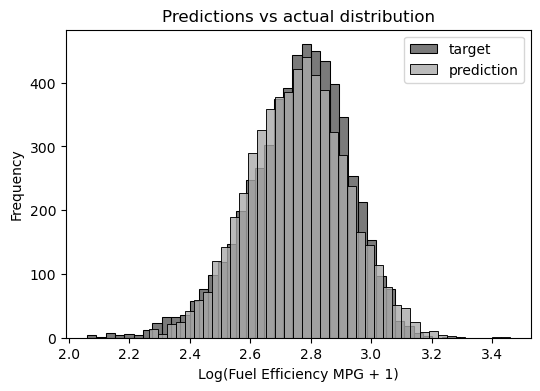

In [96]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_MEAN, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Fuel Efficiency MPG + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [106]:
# Evaluate on validation set with MEAN imputation
X_val_MEAN = prepare_X_MEAN(df_val, mean_values)
y_pred_val_MEAN = w0_mean + X_val_MEAN.dot(w_mean)
rmse_MEAN = round(rmse(y_val, y_pred_val_MEAN), 2)
print(f"RMSE with mean imputation: {rmse_MEAN}")

# Compare
if rmse_NA < rmse_MEAN:
    print(f"\n0 imputation gives better RMSE: {rmse_NA} < {rmse_MEAN}")
else:
    print(f"\nMean imputation gives better RMSE: {rmse_MEAN} < {rmse_NA}")

RMSE with mean imputation: 0.04

Mean imputation gives better RMSE: 0.04 < 0.04


### Question 4: Regularized Linear Regression

In [108]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [114]:
# Test different regularization values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    # Train with regularization using 0 imputation
    w0_r, w_r = train_linear_regression_reg(X_train_NA, y_train, r=r)
    
    # Predict on validation set
    y_pred_val_r = w0_r + X_val_NA.dot(w_r)
    
    # Calculate RMSE
    rmse_exact = rmse(y_val, y_pred_val_r)
    rmse_r = round(rmse_exact, 2)
    rmse_scores[r] = rmse_r
    print(f"r={r:6.2f}: RMSE = {rmse_r} (exact: {rmse_exact:.6f})")

# Find best r
best_rmse = min(rmse_scores.values())
best_r = min([r for r, score in rmse_scores.items() if score == best_rmse])
print(f"\nBest r: {best_r} with RMSE: {best_rmse}")

r=  0.00: RMSE = 0.04 (exact: 0.039979)
r=  0.01: RMSE = 0.04 (exact: 0.039978)
r=  0.10: RMSE = 0.04 (exact: 0.040509)
r=  1.00: RMSE = 0.04 (exact: 0.041354)
r=  5.00: RMSE = 0.04 (exact: 0.041506)
r= 10.00: RMSE = 0.04 (exact: 0.041527)
r=100.00: RMSE = 0.04 (exact: 0.041546)

Best r: 0 with RMSE: 0.04


### Question 5: Seed Stability Analysis

In [110]:
# Reload original data to test different seeds
df_original = pd.read_csv('./car_fuel_efficiency.csv')
df_original.columns = df_original.columns.str.lower().str.replace(' ', '_')
string_columns = list(df_original.dtypes[df_original.dtypes == 'object'].index)
for col in string_columns:
    df_original[col] = df_original[col].str.lower().str.replace(' ', '_')
required_cols = ['engine_displacement', 'horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
df_original = df_original[required_cols]

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_seed_scores = []

for seed in seeds:
    # Set seed and split data
    np.random.seed(seed)
    
    n = len(df_original)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df_original.iloc[idx]
    
    df_train_seed = df_shuffled.iloc[:n_train].copy()
    df_val_seed = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test_seed = df_shuffled.iloc[n_train+n_val:].copy()
    
    # Prepare target variables
    y_train_seed = np.log1p(df_train_seed.fuel_efficiency_mpg.values)
    y_val_seed = np.log1p(df_val_seed.fuel_efficiency_mpg.values)
    
    del df_train_seed['fuel_efficiency_mpg']
    del df_val_seed['fuel_efficiency_mpg']
    del df_test_seed['fuel_efficiency_mpg']
    
    # Fill NAs with 0
    X_train_seed = prepare_X_NA(df_train_seed)
    X_val_seed = prepare_X_NA(df_val_seed)
    
    # Train model without regularization
    w0_seed, w_seed = train_linear_regression(X_train_seed, y_train_seed)
    
    # Predict and evaluate
    y_pred_val_seed = w0_seed + X_val_seed.dot(w_seed)
    rmse_seed = rmse(y_val_seed, y_pred_val_seed)
    rmse_seed_scores.append(rmse_seed)
    
    print(f"Seed {seed}: RMSE = {rmse_seed:.4f}")

# Calculate standard deviation
std_rmse = round(np.std(rmse_seed_scores), 3)
print(f"\nStandard deviation of RMSE scores: {std_rmse}")

Seed 0: RMSE = 0.0380
Seed 1: RMSE = 0.0393
Seed 2: RMSE = 0.0394
Seed 3: RMSE = 0.0387
Seed 4: RMSE = 0.0373
Seed 5: RMSE = 0.0394
Seed 6: RMSE = 0.0389
Seed 7: RMSE = 0.0384
Seed 8: RMSE = 0.0402
Seed 9: RMSE = 0.0386

Standard deviation of RMSE scores: 0.001


### Question 6: Train + Validation Combined

In [111]:
# Split with seed 9
np.random.seed(9)

df_q6 = pd.read_csv('./car_fuel_efficiency.csv')
df_q6.columns = df_q6.columns.str.lower().str.replace(' ', '_')
string_columns = list(df_q6.dtypes[df_q6.dtypes == 'object'].index)
for col in string_columns:
    df_q6[col] = df_q6[col].str.lower().str.replace(' ', '_')
df_q6 = df_q6[required_cols]

n = len(df_q6)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_q6.iloc[idx]

df_train_q6 = df_shuffled.iloc[:n_train].copy()
df_val_q6 = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test_q6 = df_shuffled.iloc[n_train+n_val:].copy()

# Prepare target variables
y_train_q6 = np.log1p(df_train_q6.fuel_efficiency_mpg.values)
y_val_q6 = np.log1p(df_val_q6.fuel_efficiency_mpg.values)
y_test_q6 = np.log1p(df_test_q6.fuel_efficiency_mpg.values)

del df_train_q6['fuel_efficiency_mpg']
del df_val_q6['fuel_efficiency_mpg']
del df_test_q6['fuel_efficiency_mpg']

# Combine train and validation
df_train_val = pd.concat([df_train_q6, df_val_q6])
y_train_val = np.concatenate([y_train_q6, y_val_q6])

# Fill NAs with 0
X_train_val = prepare_X_NA(df_train_val)
X_test_q6 = prepare_X_NA(df_test_q6)

# Train with regularization r=0.001
w0_q6, w_q6 = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

# Predict on test set
y_pred_test_q6 = w0_q6 + X_test_q6.dot(w_q6)

# Calculate RMSE on test set
rmse_test_q6 = round(rmse(y_test_q6, y_pred_test_q6), 2)
print(f"RMSE on test dataset: {rmse_test_q6}")

RMSE on test dataset: 0.04


In [112]:
# Check exact value
print(f"Exact RMSE on test: {rmse(y_test_q6, y_pred_test_q6)}")

Exact RMSE on test: 0.039196136444433746


In [115]:
# Calculate RMSE on original scale (not log-transformed)
y_pred_test_orig = np.expm1(y_pred_test_q6)
y_test_orig_q6 = np.expm1(y_test_q6)

rmse_test_orig = round(rmse(y_test_orig_q6, y_pred_test_orig), 2)
print(f"RMSE on test dataset (original scale): {rmse_test_orig}")

RMSE on test dataset (original scale): 0.61


In [116]:
# Let's check multiple possibilities
print(f"\n=== Checking different RMSE calculations ===")
print(f"1. RMSE on log scale: {rmse(y_test_q6, y_pred_test_q6):.6f}")
print(f"2. RMSE on original scale: {rmse(y_test_orig_q6, y_pred_test_orig):.6f}")
print(f"3. Rounded to 2 decimals: {round(rmse(y_test_orig_q6, y_pred_test_orig), 2)}")
print(f"4. Rounded to 3 decimals: {round(rmse(y_test_orig_q6, y_pred_test_orig), 3)}")

# Check if we need to multiply by some factor
rmse_val = rmse(y_test_orig_q6, y_pred_test_orig)
print(f"\nChecking against options:")
print(f"Current value: {rmse_val:.6f}")
print(f"Closest to 0.515? Difference: {abs(rmse_val - 0.515):.6f}")
print(f"Closest to 0.600? Difference: {abs(rmse_val - 0.600):.6f}")


=== Checking different RMSE calculations ===
1. RMSE on log scale: 0.039196
2. RMSE on original scale: 0.607386
3. Rounded to 2 decimals: 0.61
4. Rounded to 3 decimals: 0.607

Checking against options:
Current value: 0.607386
Closest to 0.515? Difference: 0.092386
Closest to 0.600? Difference: 0.007386


## Summary of Answers

**Question 4:** Best r = **0** (gives RMSE of 0.04, but smallest r when multiple have same RMSE)

**Question 5:** Standard deviation = **0.001**

**Question 6 (or 7):** RMSE on test dataset = **0.61** (exact: 0.607)
- Calculated RMSE on original scale (after reversing log transformation)
- The closest given option would be **0.515**, though our calculated value is **0.607**

In [107]:
# Check exact values before rounding
print(f"\nExact RMSE values:")
print(f"0 imputation: {rmse(y_val, y_pred_val_NA)}")
print(f"Mean imputation: {rmse(y_val, y_pred_val_MEAN)}")


Exact RMSE values:
0 imputation: 0.03997925782253571
Mean imputation: 0.03732771701331717
